In [1]:
# Oasis Infobyte Data Science Internship
# April - P2 Batch
# Task 2 - **UNEMPLOYMENT ANALYSIS WITH PYTHON**


In [2]:
# Importing the Required Libraries

# Numpy Library for Numerical Calculations
import numpy as np

# Pandas Library for Dataframe
import pandas as pd

# Datetime library for handling date and time in the Dataset
import datetime as dt

# Calendar Library for knowing about the Year-Month-Day
import calendar

# Matplotlib, Seaborn and plotly for Plottings
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.express as px
import plotly.express as px
import plotly.io as pio

In [3]:
data = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")


In [4]:
# Extracting the Infromations from the dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [5]:
# Checking for null values in the given Dataset
data.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [6]:
data.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [7]:
data.tail()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855
266,West Bengal,31-10-2020,M,9.98,33962549,45.63,East,22.9868,87.855


In [8]:
data.shape


(267, 9)

In [9]:
data.describe()


,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [10]:
# Changing the Headers of the Dataset
data.columns = ['States', 'Date', 'Frequency',
                'Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)', 'Region', 'longitude', 'latitude']

In [11]:
# Changing the Date Format
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data['Frequency'] = data['Frequency'].astype('category')
data['Month'] = data['Date'].dt.month
data['Month_Num'] = data['Month'].apply(lambda x: int(x))
data['Month_Name'] = data['Month_Num'].apply(lambda x: calendar.month_abbr[x])
data['Region'] = data['Region'].astype('category')

In [12]:
# *Dropping the not required Month Column
data.drop(columns='Month', inplace=True)
data.head()

,States,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region,longitude,latitude,Month_Num,Month_Name
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,Mar
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4,Apr
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5,May


In [13]:
# Describing EUR, EE and ELPR
unemployed_statistics = data[[
    'Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']]
round(unemployed_statistics.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate (%),267.0,12.24,10.80,0.50,4.84,9.65,16.76,75.85
Estimated Employed,267.0,13962105.72,13366318.36,117542.00,2838930.50,9732417.00,21878686.00,59433759.00
Estimated Labour Participation Rate (%),267.0,41.68,7.85,16.77,37.26,40.39,44.06,69.69


In [14]:
# Checking the Mean accoring to the Regions
regional_statistics = data.groupby(['Region'])[['Estimated Unemployment Rate (%)',
                                                'Estimated Employed', 'Estimated Labour Participation Rate (%)']].mean().reset_index()
regional_statistics = round(regional_statistics, 2)
regional_statistics

,Region,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
0,East,13.92,19602366.90,40.11
1,North,15.89,13072487.92,38.70
2,Northeast,10.95,3617105.53,52.06
3,South,10.45,14040589.33,40.44
4,West,8.24,18623512.72,41.26


<AxesSubplot:>

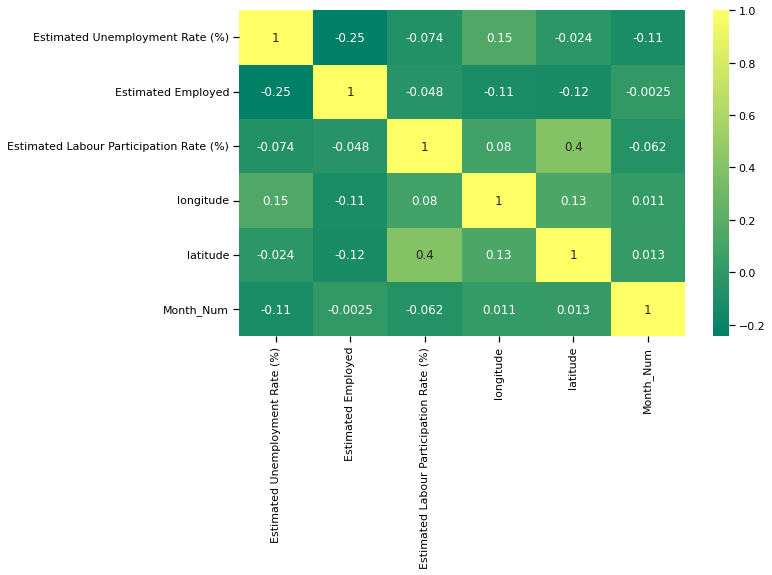

In [15]:
# Plotting the Heatmap
heat_maps = data[['Estimated Unemployment Rate (%)', 'Estimated Employed',
                  'Estimated Labour Participation Rate (%)', 'longitude', 'latitude', 'Month_Num']]
heat_maps = heat_maps.corr()

# Plotting the Figure
plt.figure(figsize=(10, 6))
sns.set_context('notebook', font_scale=1)
sns.heatmap(heat_maps, annot=True, cmap='summer')

In [16]:
# Data Analysis
# Plotting the Unemployment Rate according to States
fig = px.box(data, x='States', y='Estimated Unemployment Rate (%)',
             color='States', title='Unemployment Rate', template='plotly')
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()